In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime

sns.set_style('whitegrid')
%matplotlib inline

In [7]:
company_list = ['AAPL','MSFT','GOOG','AMZN','TSLA','META','TSM','NVDA','TCEHY','BABA']

end = datetime.now()
start = datetime(end.year-5,end.month,end.day)

for stock in company_list:
  globals()[stock] = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
data = [AAPL,MSFT,GOOG,AMZN,TSLA,META,TSM,NVDA,TCEHY,BABA]
company_name = ['Apple','Microsoft','Google','Amazon','Tesla','Meta','TSMC','Nvidia','Tencent','Alibaba']

for company, com_name in zip(data,company_name):
  company["Company Name"] = com_name

df = pd.concat(data,axis=0).sort_index()
df

,Open,High,Low,Close,Adj Close,Volume,Company Name
Date,,,,,,,
2017-08-15,40.165001,40.549999,40.035000,40.400002,38.342247,117862000,Apple
2017-08-15,73.589996,73.589996,73.040001,73.220001,68.947189,19181400,Microsoft
2017-08-15,49.445000,49.587002,49.099998,49.137001,49.137001,50986000,Amazon
2017-08-15,73.040001,73.098000,71.874001,72.466003,72.466003,15425500,Tesla
2017-08-15,171.490005,171.500000,170.009995,171.000000,171.000000,8729200,Meta
...,...,...,...,...,...,...,...
2022-08-15,122.209999,123.260002,121.570000,122.879997,122.879997,15517400,Google
2022-08-15,291.000000,294.179993,290.109985,293.470001,293.470001,18072100,Microsoft
2022-08-15,171.520004,173.389999,171.350006,173.190002,173.190002,54023100,Apple


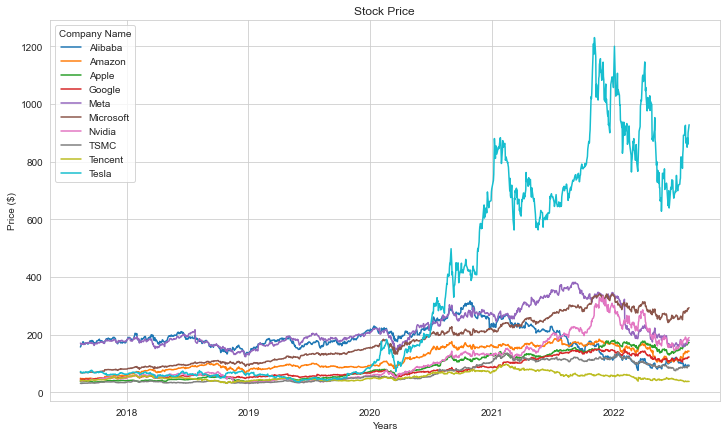

In [9]:
stock = pd.pivot_table(df,values='Adj Close',index='Date',columns='Company Name')

plt.rcParams['figure.figsize'] = [12, 7]
sns.lineplot(data=stock,dashes=False)
plt.title('Stock Price')
plt.xlabel('Years')
plt.ylabel('Price ($)')
plt.show()

In [10]:
SPY = globals()['SPY'] = yf.download('SPY',start,end)

[*********************100%***********************]  1 of 1 completed


In [11]:
benchmark = SPY['Adj Close']
benchmark.head()

Date
2017-08-15    226.019592
2017-08-16    226.413864
2017-08-17    222.883865
2017-08-18    222.535461
2017-08-21    222.709671
Name: Adj Close, dtype: float64

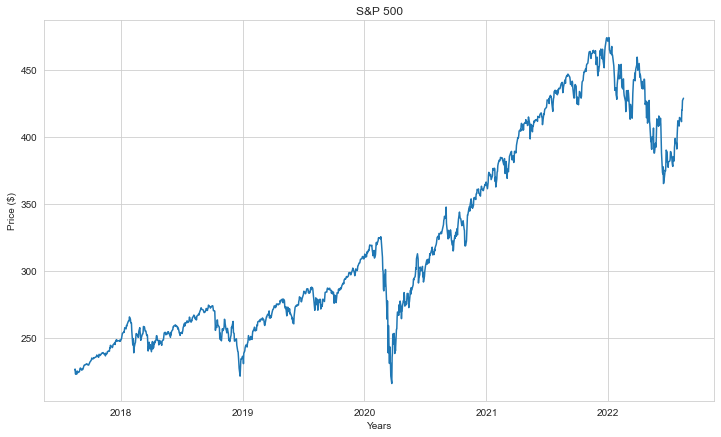

In [12]:
sns.lineplot(data=benchmark,dashes=False)
plt.title('S&P 500')
plt.xlabel('Years')
plt.ylabel('Price ($)')
plt.show()

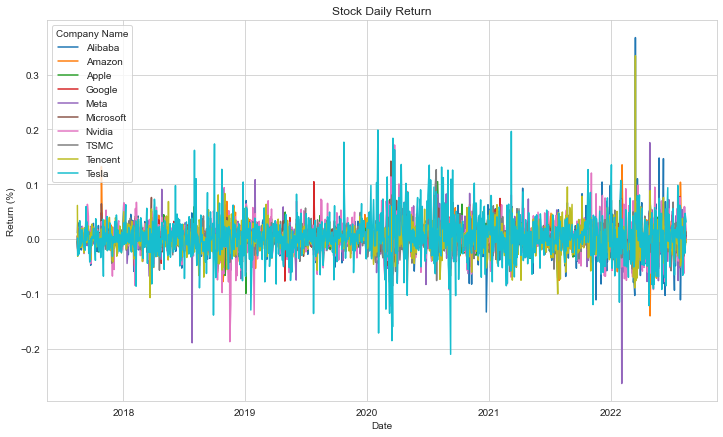

In [13]:
stock_return = stock.pct_change()
sns.lineplot(data=stock_return,dashes=False)
plt.title('Stock Daily Return')
plt.ylabel('Return (%)')

plt.show()

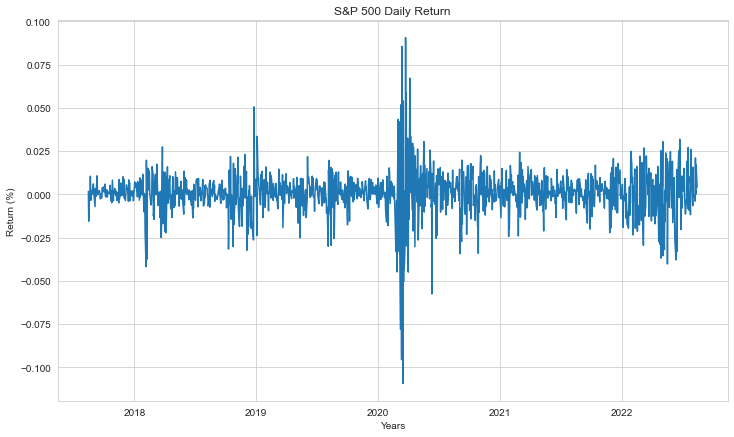

In [14]:
benchmark_return = benchmark.pct_change()
sns.lineplot(data=benchmark_return,dashes=False)
plt.title('S&P 500 Daily Return')
plt.xlabel('Years')
plt.ylabel('Return (%)')
plt.show()

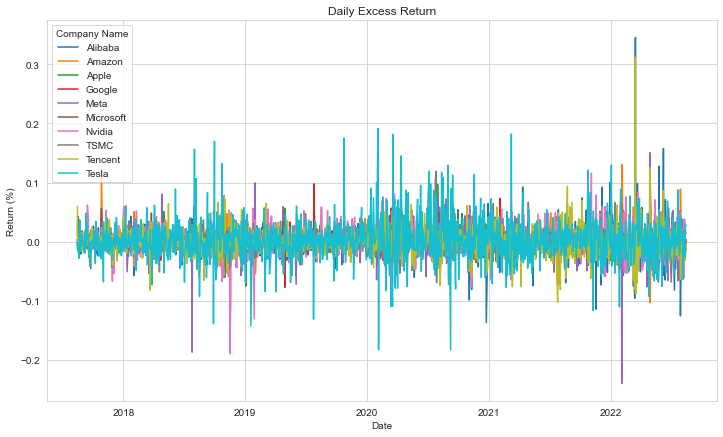

Company Name,Alibaba,Amazon,Apple,Google,Meta,Microsoft,Nvidia,TSMC,Tencent,Tesla
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,-0.000605,0.000489,0.000811,0.000361,-0.000227,0.000734,0.001119,0.000469,-0.000286,0.002241
std,0.025769,0.016445,0.012775,0.011674,0.019536,0.010468,0.024037,0.016240,0.023879,0.035939
min,-0.137312,-0.103539,-0.075745,-0.077476,-0.240396,-0.037967,-0.190159,-0.069694,-0.102769,-0.183307
25%,-0.013443,-0.007661,-0.006144,-0.005605,-0.008760,-0.005036,-0.012491,-0.008768,-0.012876,-0.016099
50%,-0.001186,-0.000309,0.000302,-0.000083,-0.000410,0.000551,0.000386,-0.000086,-0.001236,0.001453
75%,0.011475,0.007806,0.007266,0.006199,0.008342,0.005566,0.013616,0.008812,0.011325,0.019108
max,0.345465,0.130657,0.096786,0.097785,0.150676,0.056683,0.115710,0.119230,0.312174,0.191520


In [15]:
excess_return = stock_return.sub(benchmark_return,axis=0)

sns.lineplot(data=excess_return,dashes=False)
plt.title('Daily Excess Return')
plt.ylabel('Return (%)')
plt.show()

excess_return.describe()

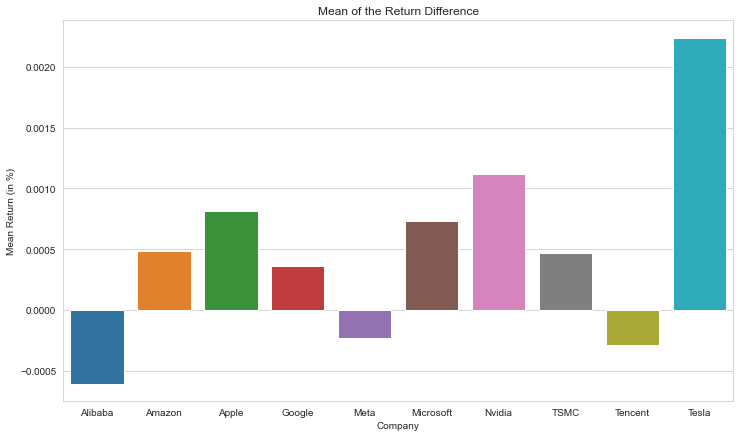

In [16]:
avg_excess_return = excess_return.mean()

sns.barplot(x=avg_excess_return.index,y=avg_excess_return.values)
plt.title('Mean of the Return Difference')
plt.ylabel('Mean Return (in %)')
plt.xlabel('Company')
plt.show()

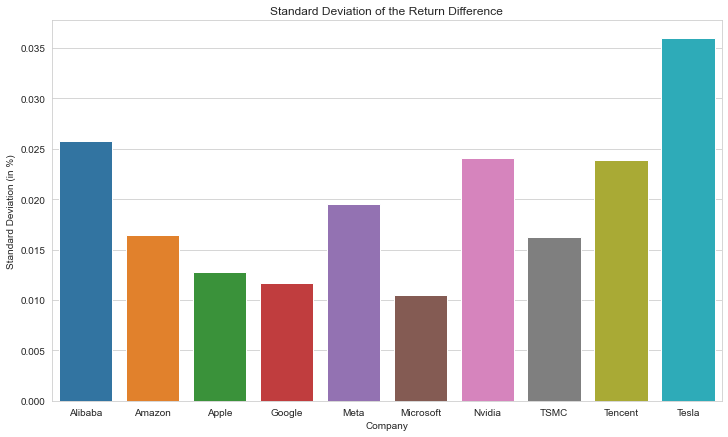

In [17]:
std_excess_return = excess_return.std()

sns.barplot(x=std_excess_return.index,y=std_excess_return.values)
plt.title('Standard Deviation of the Return Difference')
plt.ylabel('Standard Deviation (in %)')
plt.xlabel('Company')
plt.show()

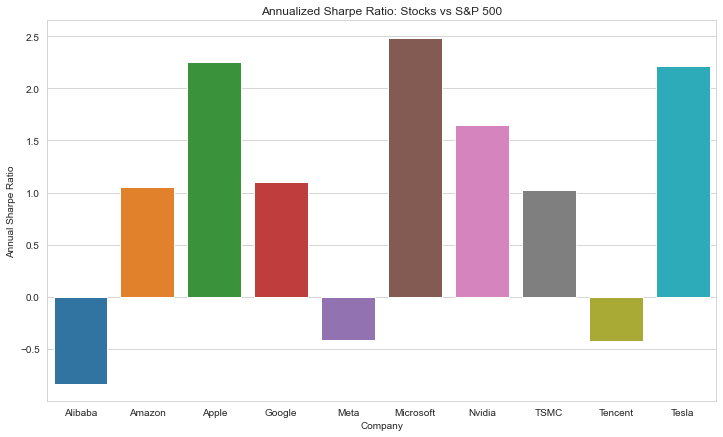

In [18]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(std_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(252*5)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plot the annualized sharpe ratio 
sns.barplot(x=annual_sharpe_ratio.index,y=annual_sharpe_ratio.values)
plt.title('Annualized Sharpe Ratio: Stocks vs S&P 500')
plt.ylabel('Annual Sharpe Ratio')
plt.xlabel('Company')
plt.show()

<AxesSubplot:xlabel='Company Name', ylabel='Company Name'>

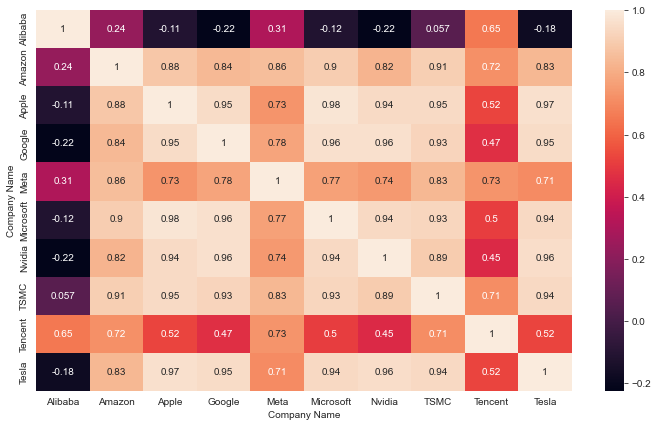

In [21]:
sns.heatmap(stock.corr(),annot=True)

<AxesSubplot:xlabel='Company Name', ylabel='Company Name'>

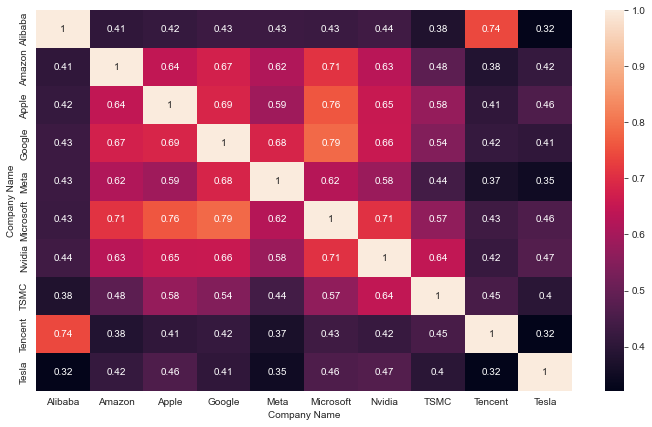

In [25]:
sns.heatmap(stock_return.corr(),annot=True)

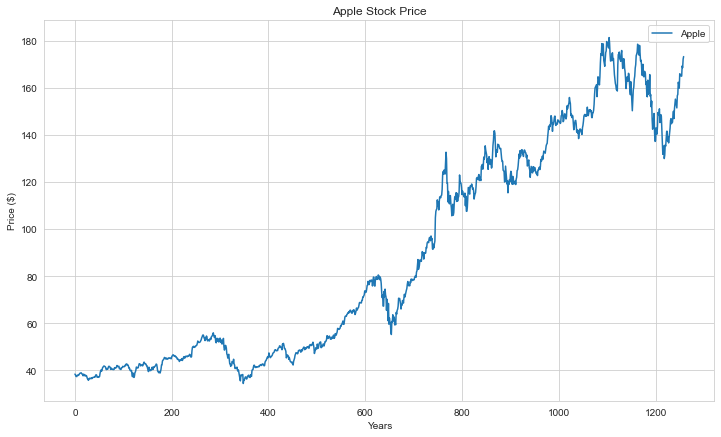

In [54]:
apple_dataset = stock['Apple'].reset_index()

sns.lineplot(data=apple_dataset)
plt.title('Apple Stock Price')
plt.ylabel('Price ($)')
plt.xlabel('Years')
plt.show()

In [68]:
# Create a new dataframe with only the 'Close column 
data = stock.filter(['Apple'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1197

In [69]:
dataset

array([[ 38.34224701],
       [ 38.1880188 ],
       [ 37.4548645 ],
       ...,
       [168.49000549],
       [172.1000061 ],
       [173.19000244]])

In [72]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02706547],
       [0.02601553],
       [0.02102447],
       ...,
       [0.91306681],
       [0.93764246],
       [0.94506278]])

In [73]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.02706547, 0.02601553, 0.02102447, 0.02044299, 0.01997459,
       0.02412571, 0.02444876, 0.02330194, 0.02425493, 0.02685545,
       0.02918133, 0.02989205, 0.03094193, 0.0310228 , 0.02784075,
       0.0275662 , 0.02651627, 0.02226821, 0.02690391, 0.02587018,
       0.02391564, 0.02170284, 0.02428723, 0.02233277, 0.02242969,
       0.01813322, 0.01380442, 0.01138155, 0.00921718, 0.01340058,
       0.01516118, 0.01362674, 0.01498347, 0.01448284, 0.01556492,
       0.01394975, 0.01703485, 0.01688951, 0.01776171, 0.0178586 ,
       0.0189085 , 0.0180201 , 0.0196192 , 0.02428723, 0.02524022,
       0.02409335, 0.01798779, 0.01842394, 0.01829472, 0.01979691,
       0.01868236, 0.02029762, 0.02940755, 0.03533542, 0.03908264,
       0.03560999, 0.03758056, 0.04467146, 0.04749802, 0.04840258])]
[0.050712352014138845]

[array([0.02706547, 0.02601553, 0.02102447, 0.02044299, 0.01997459,
       0.02412571, 0.02444876, 0.02330194, 0.02425493, 0.02685545,
       0.02918133, 0.02989205, 0.0

In [74]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1137/1137 [==============================] - 27s 21ms/step - loss: 0.0022


In [75]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 18ms/step


6.308280267867904

/var/folders/js/hx1c0jw17zdfth8hhz4z2n3m0000gn/T/ipykernel_3353/2578603434.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


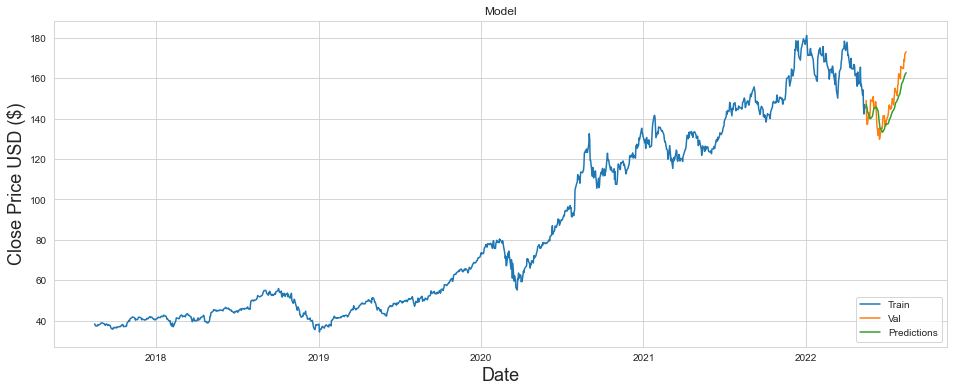

In [80]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Apple'])
plt.plot(valid[['Apple', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [81]:
# Show the valid and predicted prices
valid

Company Name,Apple,Predictions
Date,,
2022-05-17,149.032990,147.148026
2022-05-18,140.624680,146.438797
2022-05-19,137.159485,145.227509
2022-05-20,137.399139,143.554977
2022-05-23,142.911484,141.890198
...,...,...
2022-08-09,164.919998,159.450836
2022-08-10,169.240005,160.025146
2022-08-11,168.490005,160.893158
